# Bar chart showing the meat consumption per capita (top 10 countries)

## Get the data

Let's load the data, filter by year (2023), sort by meat consumption value in descending order and select the first ten records.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_ornaments.titles import set_title_and_subtitle

df = pd.read_csv('https://raw.githubusercontent.com/bianconif/graphic_communication_notebooks/refs/heads/master/data/top-10-meat-consumption-countries-2023.csv',comment='#')
df = df[df['Year'] == (year := 2023)]
df.sort_values(by='Value', ascending=False, inplace=True)
df = df[0:10]
print(df)

          Country  Value  Year
0       Argentina   34.4  2023
2   United States   24.7  2023
4       Australia   23.7  2023
6          Israel   21.3  2023
8      Kazakhstan   19.9  2023
10         Brazil   19.2  2023
12         Canada   17.6  2023
14          Chile   16.7  2023
16    Switzerland   12.9  2023
18       Paraguay   12.7  2023


## Create the bar chart

Create an empty figure (`fig`) with one sub-plot (`ax`) using [Matplotlib's object oriented interface](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html) [1]. Then use the subplot as the canvas where to generate the bar chart using Matplotlib's [`matplotlib.axes.Axes.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) method. Finally we rotate the x-axis tick labels vertically to avoid them from overlapping. 

Note that we keep the value returned by [`Axes.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) (`bars`) for future use. This is a list of [`matplotlib.patches.Rectangle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) objects.

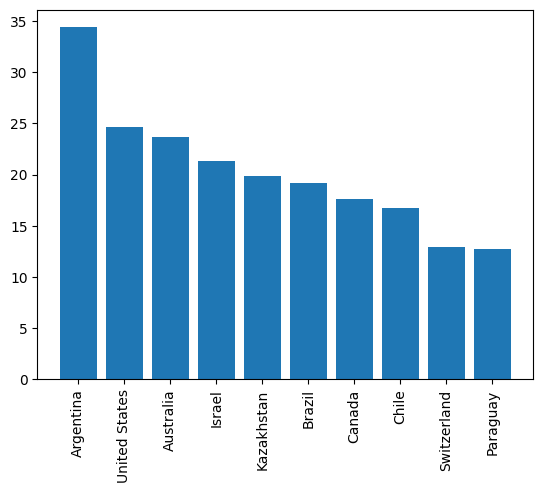

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=1)
bars = ax.bar(x=df['Country'], height=df['Value'])
ax.tick_params('x', rotation=90)

## Change the bars' colour

Our first tweak consists of changing the bars' edge and fill colour. We pick the fill colour from one of [Matplotlib's named colours](https://matplotlib.org/stable/gallery/color/named_colors.html), choosing it from the Tableau Palette in this case. 

Note that we modify the colours a posteriori by leveraging on [`matplotlib.patches.Rectangle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)'s `set_color` and `set_edgecolor` methods. Alternatively, we could have set the colours a priori by passing them as arguments to Matplotlib's [`matplotlib.axes.Axes.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) (parameters `facecolor` and `edgecolor`). 

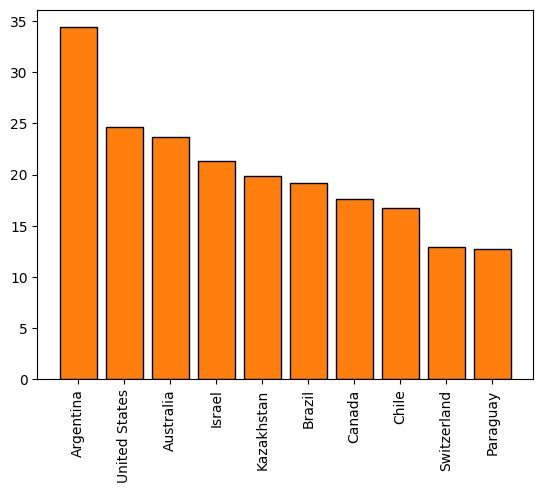

In [3]:
fill_colour = 'tab:orange'
edge_colour = 'black'
for bar in bars:
    bar.set_color(fill_colour)
    bar.set_edgecolor(edge_colour)
display(fig)

## Get rid of the spines

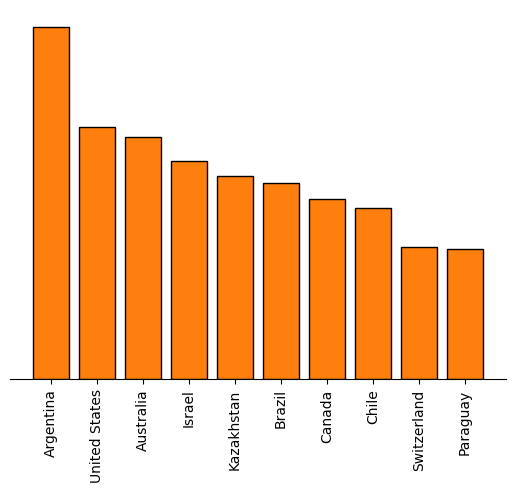

In [4]:
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.get_yaxis().set_visible(False)
display(fig)

## Show the values at the top of each bar

Use [`matplotlib.axes.Axes.bar_label`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html) to display the values at the top of each bar. The `padding` parameter defines the space between the values and the bars.

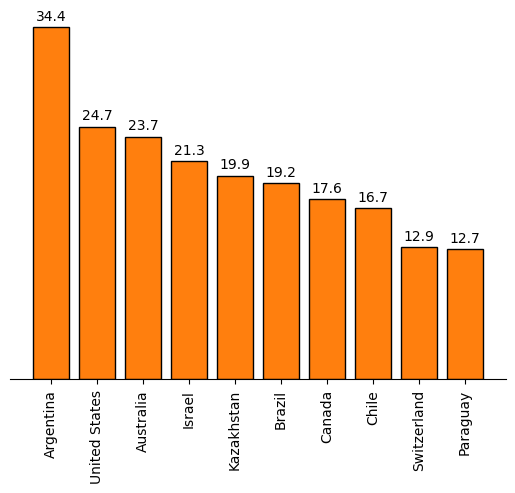

In [5]:
ax.bar_label(container=bars, padding=3)
display(fig)

## Add title and subtitle

Add a title and subtitle to the chart with [`mpl_ornaments.set_title_and_subtitle`](https://bianconif.github.io/mpl_ornaments/reference/).

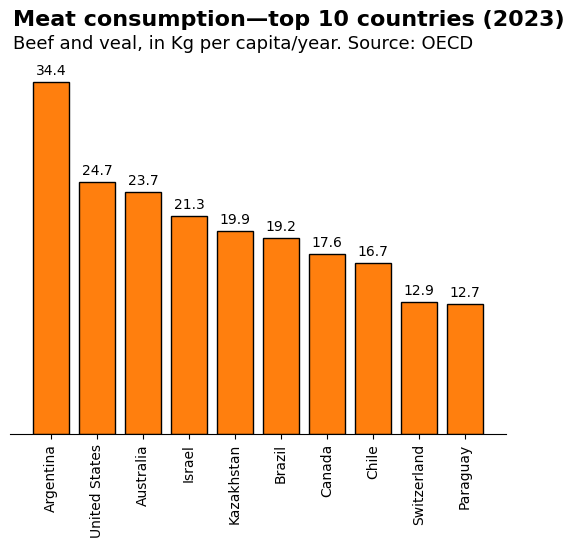

In [6]:
title = f'Meat consumption\u2014top 10 countries ({year})'
subtitle = f'Beef and veal, in Kg per capita/year. Source: OECD'
set_title_and_subtitle(fig=fig, title=title, subtitle=subtitle, alignment='left', h_offset=60)
display(fig)

## References

[1] Bianconi F. [Data and process visualisation for graphic communication: A hands-on approach with Python](https://link.springer.com/book/10.1007/978-3-031-57051-3). Cham: Springer, 2024.

## Licence

Copyright © 2025 [Francesco Bianconi](https://www.bianconif.net/Home.html). All rights reserved.